<a href="https://colab.research.google.com/github/danielm322/DS4A_Team9_Social_Distancing_Detector/blob/master/Ejemplo_Vision_Keras_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [0]:
# Grabbing the MNIST dataset
dataset = datasets.fetch_openml('mnist_784')

# Scale raw pixel intensities to [0, 1], then split data
data = dataset.data.astype("float") / 255.0
(trainX, testX, trainY, testY) = train_test_split(data, dataset.target, test_size=0.25)

In [4]:
data.shape

(70000, 784)

In [0]:
# convert labels from integers to vectors . Se llama One Hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

In [0]:
# define the 784-256-128-10 architecture using keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [7]:
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=128)

Train on 52500 samples, validate on 17500 samples
Epoch 1/100
52500/52500 [==============================] - 3s 64us/step - loss: 2.2868 - accuracy: 0.1821 - val_loss: 2.2535 - val_accuracy: 0.2675
Epoch 2/100
52500/52500 [==============================] - 2s 32us/step - loss: 2.2253 - accuracy: 0.3705 - val_loss: 2.1936 - val_accuracy: 0.5130
Epoch 3/100
52500/52500 [==============================] - 2s 32us/step - loss: 2.1581 - accuracy: 0.5186 - val_loss: 2.1159 - val_accuracy: 0.5442
Epoch 4/100
52500/52500 [==============================] - 2s 32us/step - loss: 2.0661 - accuracy: 0.5919 - val_loss: 2.0071 - val_accuracy: 0.5982
Epoch 5/100
52500/52500 [==============================] - 2s 32us/step - loss: 1.9377 - accuracy: 0.6296 - val_loss: 1.8563 - val_accuracy: 0.6444
Epoch 6/100
52500/52500 [==============================] - 2s 32us/step - loss: 1.7685 - accuracy: 0.6629 - val_loss: 1.6703 - val_accuracy: 0.6721
Epoch 7/100
52500/52500 [==============================] - 2s 

In [8]:
# evaluate the network
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in lb.classes_]))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1716
           1       0.94      0.96      0.95      2013
           2       0.91      0.90      0.90      1664
           3       0.92      0.89      0.90      1835
           4       0.91      0.93      0.92      1746
           5       0.88      0.88      0.88      1602
           6       0.93      0.95      0.94      1667
           7       0.93      0.93      0.93      1817
           8       0.90      0.86      0.88      1693
           9       0.90      0.89      0.90      1747

    accuracy                           0.92     17500
   macro avg       0.92      0.92      0.92     17500
weighted avg       0.92      0.92      0.92     17500



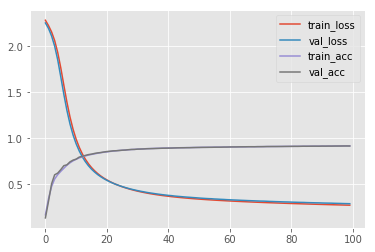

In [0]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.legend()

In [0]:
# The closeness of the lines implies that there is no overfitting occurring